# Импорт библиотек и модулей

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import hypertools as hyp
from scipy.stats import norm
import pylab

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    
from lightgbm import LGBMClassifier

# Импорт данных

In [53]:
df = pd.read_csv(r'Churn_Modelling.csv')

In [54]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.shape

(1470, 35)

# Exploratory Data Analysis (EDA)

Посмотрим на столбцы в данных

In [11]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [12]:
np.unique(df.Attrition, return_counts=True)[1]/len(df)

array([0.83877551, 0.16122449])

Посмотрим на пропущенные значения

In [13]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Посмотрим на типы данных в датафрейм

In [14]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

Числовые характеристики

In [15]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


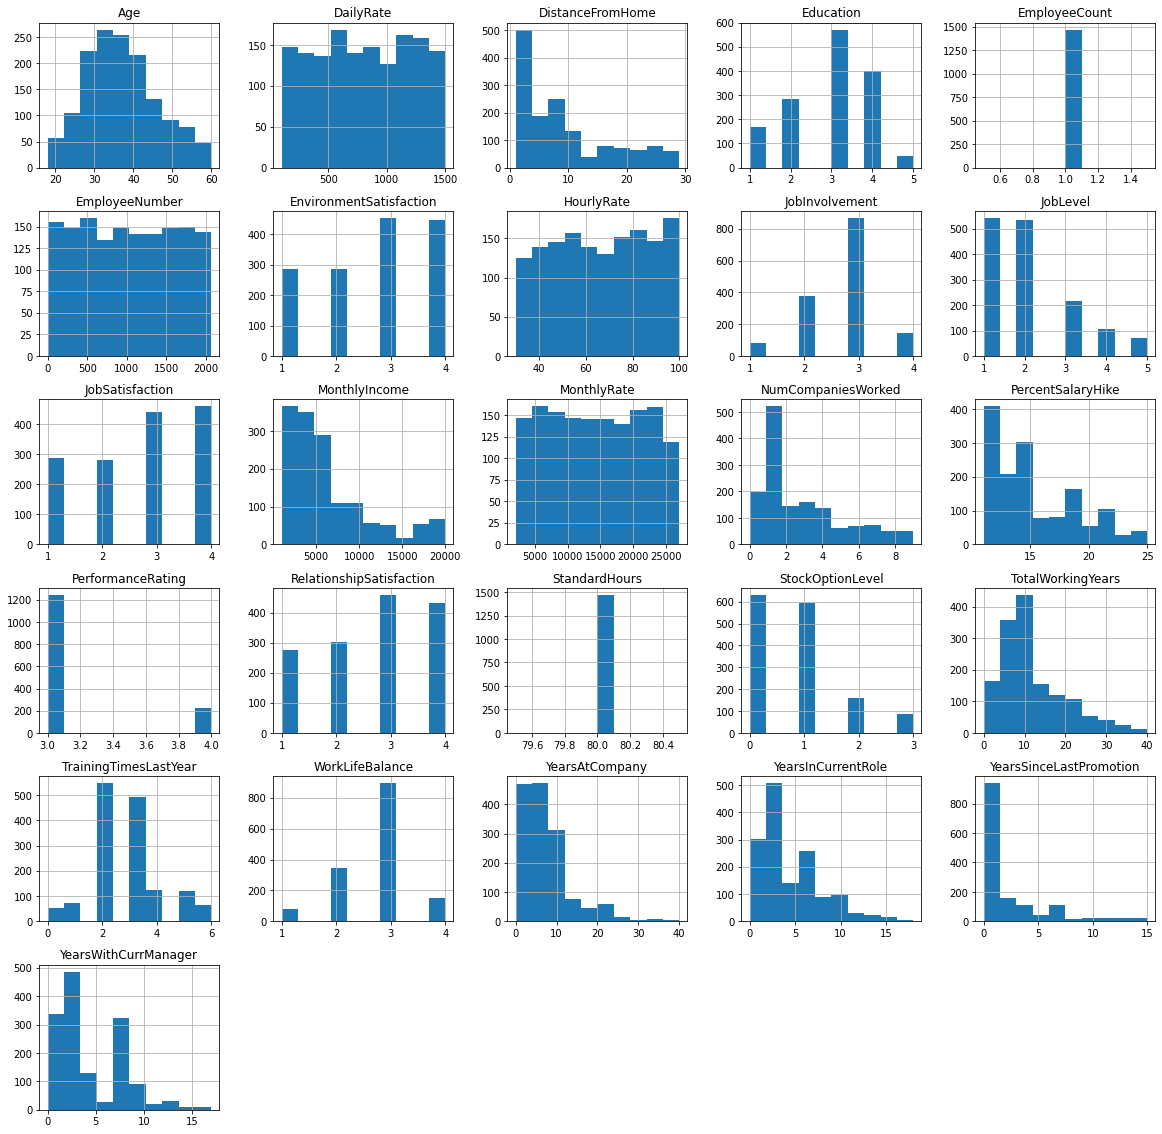

In [16]:
df.hist(figsize=(20,20))
plt.show()

#### Выводы:
* Распределение "Age" можно представить как нормальное распределение. Правда оно немного искажено как вправо, так и влево. 
* EmployeeCount и StandardHours являются избыточными столбцами, так как для всех сотрудников значения одинаковые.
* Многие столбцы смещены и вправо, и влево. Следовательно, понадобится нормализация данных.

### Корреляция

In [17]:
df_transf = df.copy()
df_transf["Attrition"] = df_transf["Attrition"].apply(
    lambda x: 0 if x == 'No' else 1)

df_transf = df_transf.drop(["EmployeeCount", "StandardHours", 
                            "EmployeeNumber", "Over18"], axis=1)

correlations = df_transf.corr()["Attrition"].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Attrition             1.000000
Name: Attrition, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Attrition, dtype: float64


<AxesSubplot:>

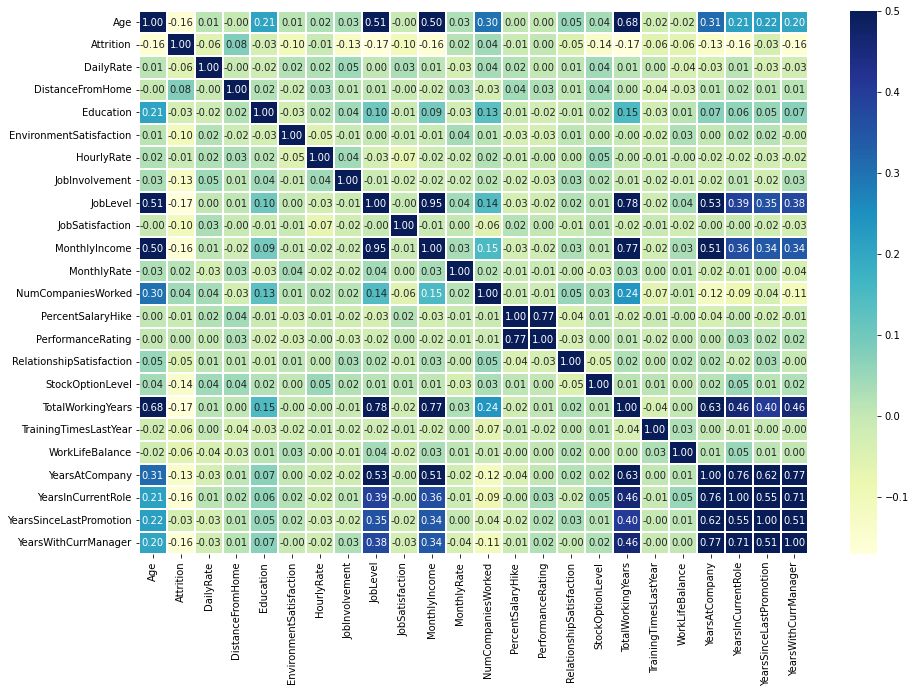

In [18]:
corilation_matrix = df_transf.corr()
mask = np.zeros_like(corilation_matrix)
mask[np.triu_indices_from(mask)] = True

# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corilation_matrix, vmax=.5,
            annot=True, fmt=".2f",
            linewidths=.2, cmap="YlGnBu")

Из корреляционной матрицы можно заметить:
* Признаки "MonthlyRate", "NumCompaniesWorked" и "DistanceFromHome" положительно коррелируют с выбытием;
* Признаки "Age", "TotalWorkingYears", "MonthlyIncome", "JobLevel" и  "YearsInCurrentRole"  отрицательно коррелируют с выбытием.

### Посмотрим на выбросы

C:\Users\isaev\AppData\Local\Temp\ipykernel_2636\575862219.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



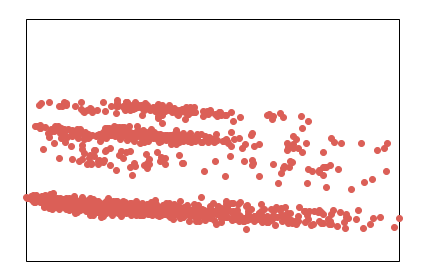

In [19]:
hyp.plot(df.drop('Attrition', 1), normalize='across', reduce='PCA', ndims=2, fmt='o')

Можно заметить, что значения в признаках довольно размашистые. Поэтому, для улучшения качества работы модели, нужно будет провести шкалирование данных

### Ключевые признаки

In [20]:
attrited_df = df[df["Attrition"] == "Yes"]
attrited_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3


### 1) Age - возраст сотрудников. 

In [21]:
mean, stdev = norm.fit(df.loc[df['Attrition'] == 'Yes', 'Age'])
print(
    'Ex-сотрудники: средний возраст = {:.1f}, стандартное отклонение = {:.1f}'.format(mean, stdev))

mean, stdev = norm.fit(df.loc[df['Attrition'] == 'No', 'Age'])
print(
    'Работающие сотрудники: средний возраст = {:.1f}, стандартное отклонение = {:.1f}'.format(mean, stdev))

Ex-сотрудники: средний возраст = 33.6, стандартное отклонение = 9.7
Работающие сотрудники: средний возраст = 37.6, стандартное отклонение = 8.9


Давайте создадим график оценки плотности ядра (KDE), окрашенный значением целевого объекта. Оценка плотности ядра (KDE) - это непараметрический способ оценки функции плотности вероятности случайной величины. Это позволит нам определить, существует ли корреляция между возрастом Клиента и его способностью вернуть долг.

Text(0.5, 1.0, 'Распределение по возрасту в процентах по статусу выбытия')

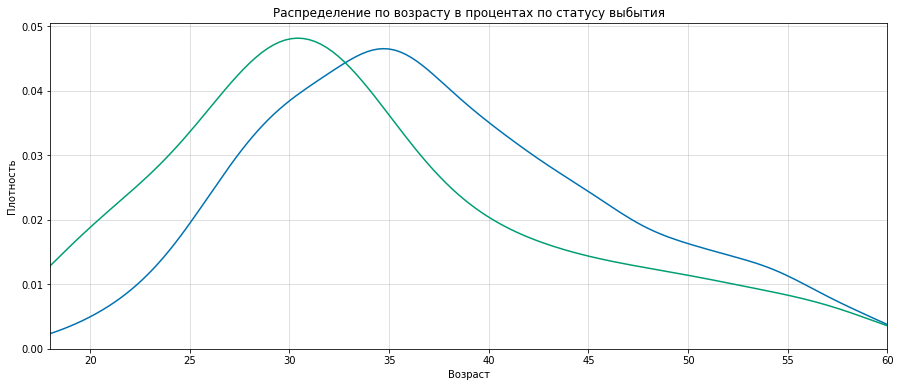

In [22]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'Age'], label = 'Active Employee')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'Age'], label = 'Ex-Employees')
plt.xlim(left=18, right=60)
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.title('Распределение по возрасту в процентах по статусу выбытия')

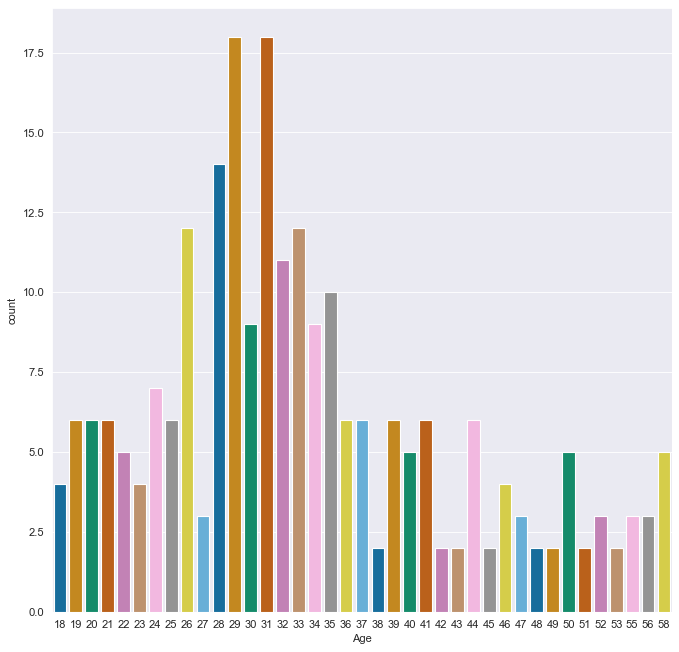

In [23]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,10),dpi=80)
sns.countplot(x='Age',data=df[df['Attrition'] == 'Yes'],palette='colorblind')

plt.xlabel('Age')
plt.show()

Больше всего людей уходило в возрасте от 26 до 35(достаточно молодые специалисты)

### 2) Gender

In [24]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [25]:
print("Нормализованное гендерное распределение ex-сотрудников в наборе данных: Male = {:.1f}%; Female {:.1f}%."
      .format((df[(df['Attrition'] == 'Yes') & 
                  (df['Gender'] == 'Male')].shape[0] / df[df['Gender'] == 'Male'].shape[0])*100, 
              (df[(df['Attrition'] == 'Yes') & 
                  (df['Gender'] == 'Female')].shape[0] / df[df['Gender'] == 'Female'].shape[0])*100))

Нормализованное гендерное распределение ex-сотрудников в наборе данных: Male = 17.0%; Female 14.8%.


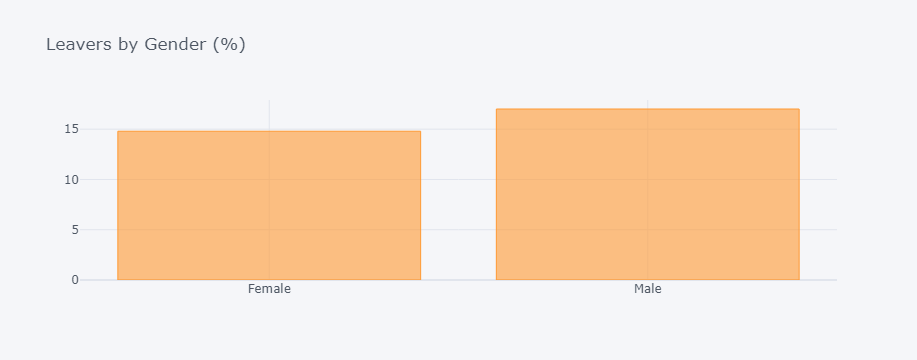

In [26]:
df_gndr = pd.DataFrame(columns=["Gender", "% of Leavers"])
i=0

for field in list(df['Gender'].unique()):
    
    ratio = df[(df['Gender']==field) & (df['Attrition']=="Yes")].shape[0] / df[df['Gender']==field].shape[0]
    df_gndr.loc[i] = (field, ratio*100)
    i+=1
    
df_gndr = df_gndr.groupby(by="Gender").sum()
df_gndr.iplot(kind='bar',title='Leavers by Gender (%)')

Гендерное распределение показывает, что в наборе данных относительная доля бывших сотрудников-мужчин выше, чем бывших сотрудников-женщин, при нормализованном гендерном распределении бывших сотрудников в наборе данных составляет 17,0% для мужчин и 14,8% для женщин.

### 3) Education

In [27]:
df["EducationField"].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

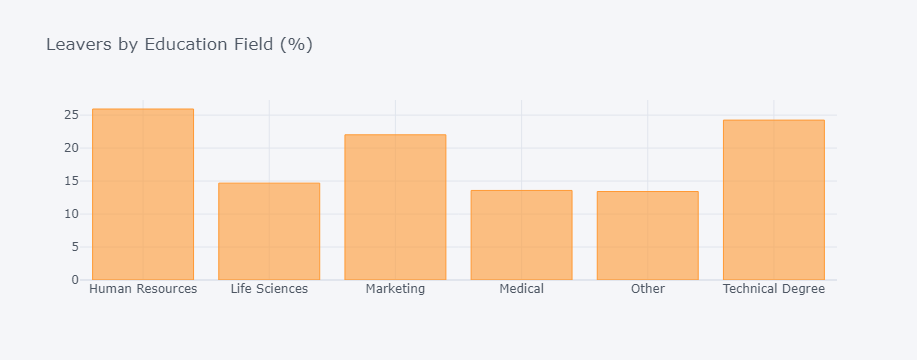

In [28]:
df_EdField = pd.DataFrame(columns=["Field", "% of Leavers"])
i=0

for field in list(df['EducationField'].unique()):
    ratio = df[(df['EducationField']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['EducationField']==field].shape[0]
    df_EdField.loc[i] = (field, ratio*100)
    i += 1
    
df_EF = df_EdField.groupby(by="Field").sum()
df_EF.iplot(kind='bar',title='Leavers by Education Field (%)')

### 3) Department

In [29]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

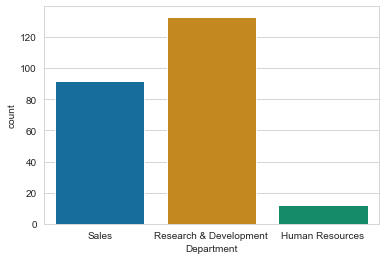

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='Department',data=attrited_df,palette='colorblind')

plt.show()

Большинство людей уходило из research & Development Department

### 4) JobRole

In [24]:
# Employees in the database have several roles on-file
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

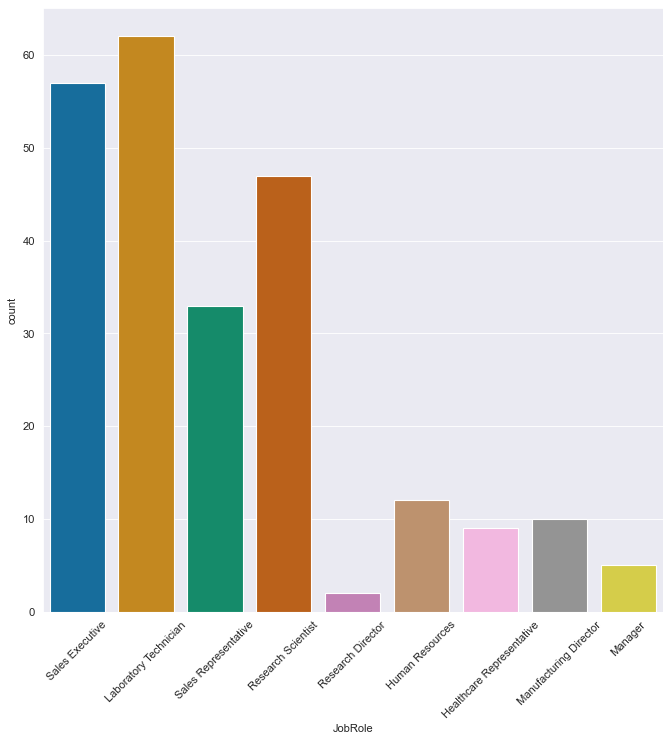

In [25]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,10),dpi=80)
sns.countplot(x='JobRole',data=attrited_df,palette='colorblind')

plt.xlabel('JobRole')
plt.xticks(rotation=45)
plt.show()

Большинство уволившихся были или техническими лаборантами,или директорами по продажам, или научными исследователями

### 5) DistanceFromHome

In [26]:
print('Average distance from home for currently active employees: {:.2f} miles and ex-employees: {:.2f} miles'.format(
    df[df['Attrition'] == 'No']['DistanceFromHome'].mean(), df[df['Attrition'] == 'Yes']['DistanceFromHome'].mean()))

Average distance from home for currently active employees: 8.92 miles and ex-employees: 10.63 miles


Text(0.5, 1.0, 'Distance From Home Distribution in Percent by Attrition Status')

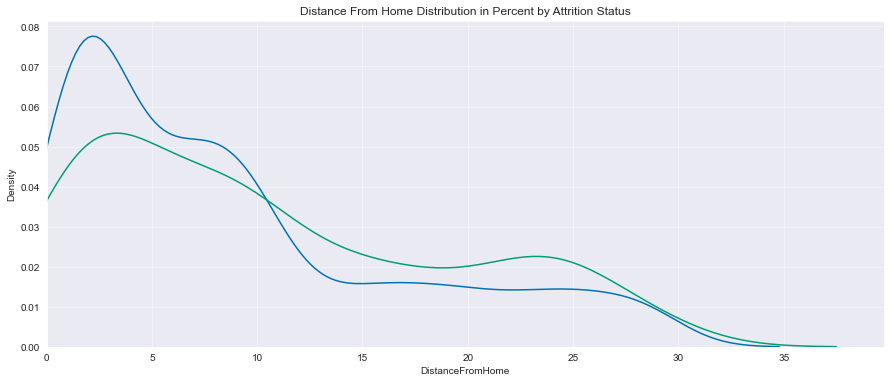

In [27]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'DistanceFromHome'], label = 'Active Employee')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'DistanceFromHome'], label = 'Ex-Employees')
plt.xlabel('DistanceFromHome')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Distance From Home Distribution in Percent by Attrition Status')

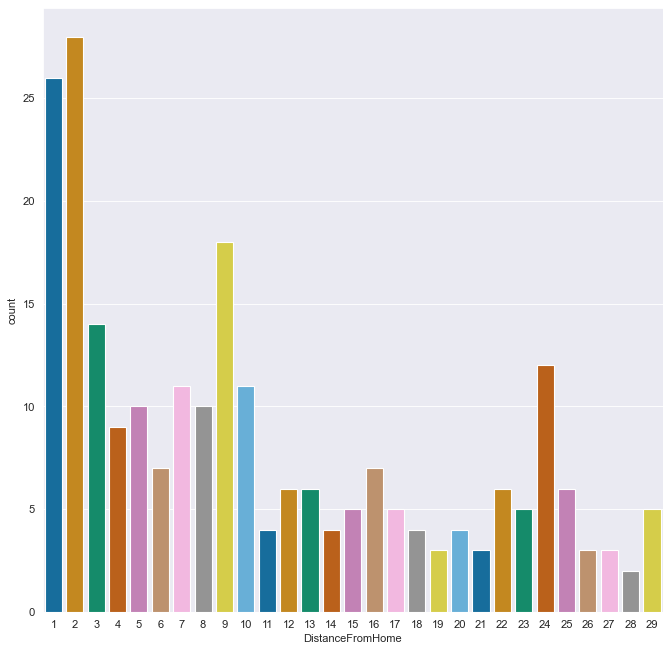

In [28]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,10),dpi=80)
sns.countplot(x='DistanceFromHome',data=attrited_df,palette='colorblind')

plt.show()

Большая часть уволившихся жила рядом с работой

### 6) MaritalStatus

In [29]:
# Marital Status of employees
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

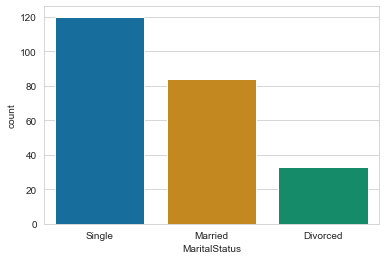

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='MaritalStatus',data=attrited_df,palette='colorblind')

plt.show()

большая часть увольвшихся была не жената/не замужем

### 7) RelationshipSatisfaction

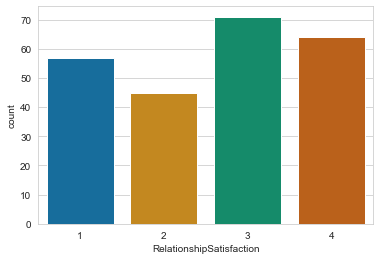

In [31]:
sns.set_style('whitegrid')
sns.countplot(x='RelationshipSatisfaction',data=attrited_df,palette='colorblind')

plt.show()

Много людей не было удовлетворены коллективом

### 8) EnvironmentSatisfaction

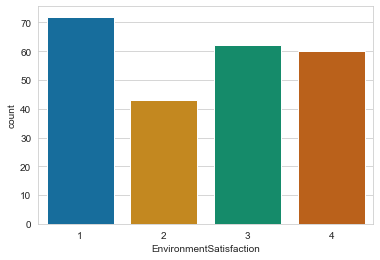

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='EnvironmentSatisfaction',data=attrited_df,palette='colorblind')

plt.show()

Большинству не нравилась обстановка на работе

### 9) WorkLifeBalance

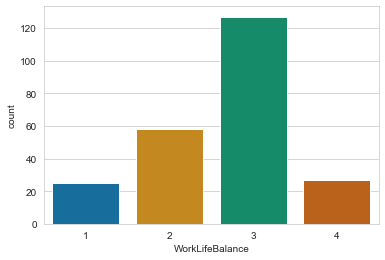

In [33]:
sns.set_style('whitegrid')
sns.countplot(x='WorkLifeBalance',data=attrited_df,palette='colorblind')

plt.show()

Большинство имело хороший баланс между личной жизнью и работой

### 10) YearsAtCompany

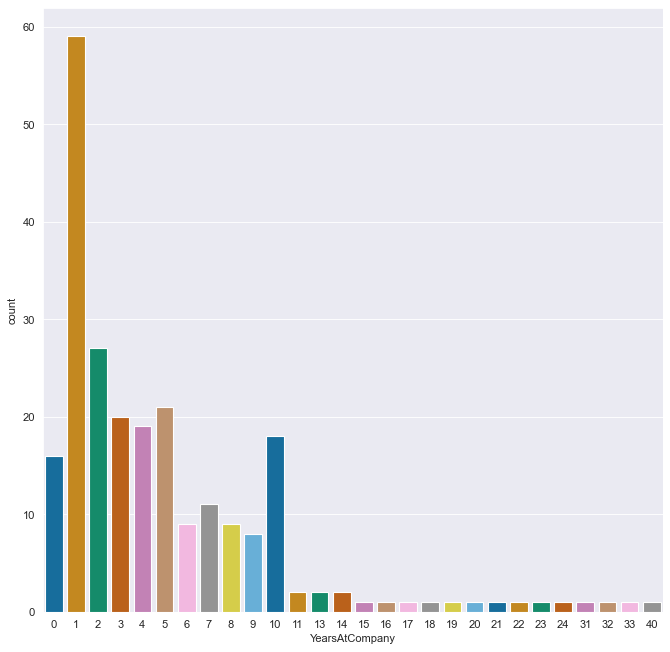

In [34]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,10),dpi=80)
sns.countplot(x='YearsAtCompany',data=attrited_df,palette='colorblind')

plt.show()

Большинство не проводило и двух лет в компании 

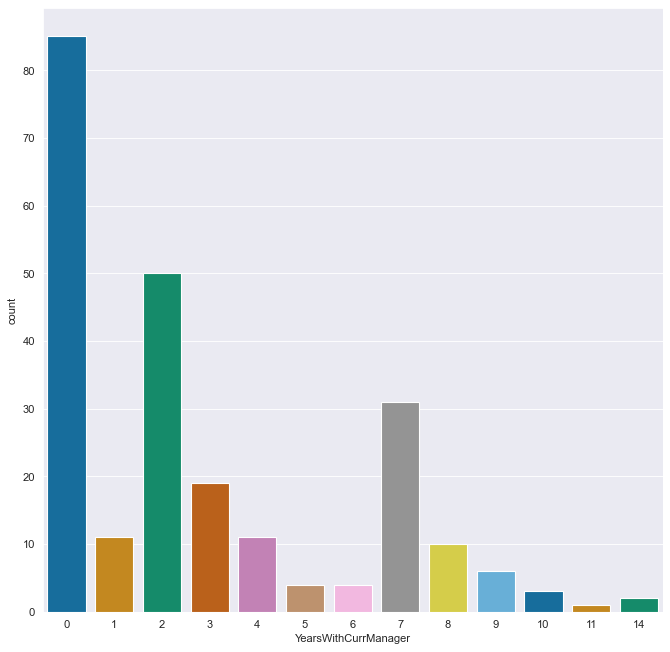

In [35]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,10),dpi=80)
sns.countplot(x='YearsWithCurrManager',data=attrited_df,palette='colorblind')

plt.show()

Большинство и года не пробыло с текущим менеджером

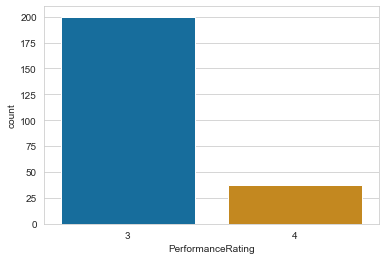

In [36]:
sns.set_style('whitegrid')
sns.countplot(x='PerformanceRating',data=attrited_df,palette='colorblind')

plt.show()

Все уволившиеся отлично справлялись с работой


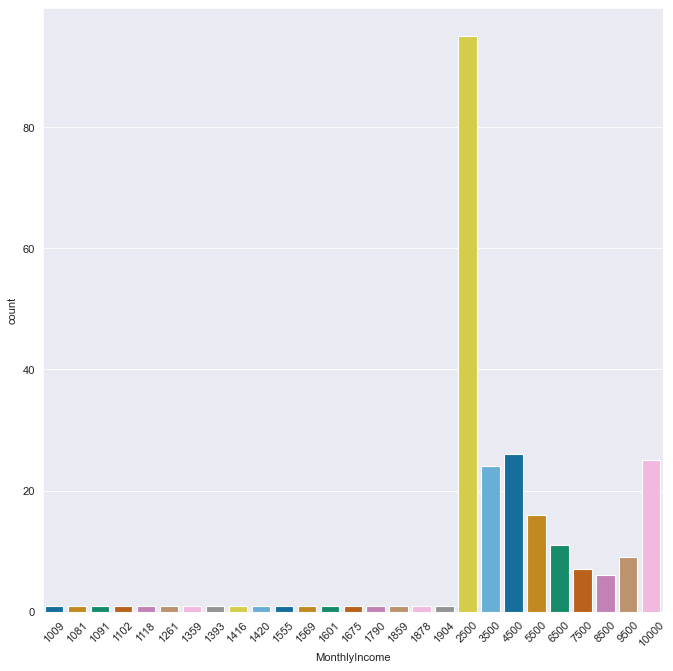

In [37]:
for line in df['MonthlyIncome']:
  
    if line >= 2000 and line < 3000:
        attrited_df.loc[(df.MonthlyIncome == line), 'MonthlyIncome' ] = 2500
    elif line >= 3000 and line < 4000:
        attrited_df.loc[(df.MonthlyIncome == line), 'MonthlyIncome' ] = 3500
    elif line >= 4000 and line < 5000:
        attrited_df.loc[(df.MonthlyIncome == line), 'MonthlyIncome' ] = 4500
    elif line >= 5000 and line < 6000:
        attrited_df.loc[(df.MonthlyIncome == line), 'MonthlyIncome' ] = 5500
    elif line >= 6000 and line < 7000:
        attrited_df.loc[(df.MonthlyIncome == line), 'MonthlyIncome' ] = 6500
    elif line >= 7000 and line < 8000:
        attrited_df.loc[(df.MonthlyIncome == line), 'MonthlyIncome' ] = 7500
    elif line >= 8000 and line < 9000:
        attrited_df.loc[(df.MonthlyIncome == line), 'MonthlyIncome' ] = 8500
    elif line >= 9000 and line < 10000:
        attrited_df.loc[(df.MonthlyIncome == line), 'MonthlyIncome' ] = 9500
    elif line >= 10000:
        attrited_df.loc[(df.MonthlyIncome == line), 'MonthlyIncome' ] = 10000


sns.set_style('darkgrid')
plt.figure(figsize=(10,10),dpi=80)
sns.countplot(x='MonthlyIncome',data=attrited_df,palette='colorblind')
plt.xticks(rotation=45)
plt.show()

большая часть зарабатывала от 2000 до 3000 

# ВЫВОДЫ:

* Одинокие сотрудники демонстрируют наибольшую долю увольняющихся по сравнению с женатыми и разведенными коллегами.
* Около 10% выпускников уходят, когда им исполняется 2 года в компании.
* Лояльные сотрудники с более высокой зарплатой и большим количеством обязанностей демонстрируют меньшую долю увольняющихся по сравнению с их коллегами.
* Люди, которые живут дальше от своей работы, демонстрируют более высокую долю увольняющихся по сравнению с их коллегами.
* Люди, которые часто путешествуют, демонстрируют более высокую долю увольняющихся по сравнению со своими коллегами.
* Люди, которым приходится работать сверхурочно, демонстрируют более высокую долю увольняющихся по сравнению со своими коллегами.
* Сотрудники, работающие в качестве торговых представителей, показывают значительный процент увольняющихся в представленном наборе данных.
* Сотрудники, которые ранее уже работали в нескольких компаниях (уже "переключались" с одного рабочего места на другое), демонстрируют более высокую долю увольняющихся по сравнению со своими коллегами.
* Набор данных не содержит каких-либо отсутствующих или ошибочных значений данных, и все объекты имеют правильный тип данных.
* Самыми сильными положительными корреляциями с целевыми характеристиками являются: Рейтинг Производительности, Ежемесячная Ставка, Количество Работающих Компаний, Расстояние От Дома.
* Самыми сильными положительными корреляциями с целевыми характеристиками являются: Рейтинг Производительности, Ежемесячная Ставка, Количество Работающих Компаний, Расстояние От Дома.
* Самыми сильными отрицательными корреляциями с целевыми характеристиками являются: Общее количество рабочих лет, Уровень работы, Годы в Текущей Должности и Ежемесячный доход.
* Набор данных несбалансирован с большинством наблюдений, описывающих действующих в настоящее время сотрудников.
* Несколько функций (т.е. столбцов) являются избыточными для нашего анализа, а именно: EmployeeCount, employeeNumber, StandardHours и Over18.




# Pre-processing

### 1) Encoding

Кодирование данных необходимо для столбцов с типом данных **object**. Это необхоимо так как модель может воспринимать только чиселки.

In [55]:
encoder = LabelEncoder()

In [56]:
le_count = 0

for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            encoder.fit(df[col])
            df[col] = encoder.transform(df[col])
            le_count += 1
            
print('{} columns were label encoded.'.format(le_count))

1 columns were label encoded.


In [57]:
# convert rest of categorical variable into dummy
df = pd.get_dummies(df, drop_first=True)

In [58]:
print(df.shape)
df.head()

(10000, 2945)


,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,Surname_Zotov,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain
0,1,15634602,619,0,42,2,0.00,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,15647311,608,0,41,1,83807.86,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,3,15619304,502,0,42,8,159660.80,3,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,15701354,699,0,39,1,0.00,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,15737888,850,0,43,2,125510.82,1,1,1,...,0,0,0,0,0,0,0,0,0,1


### 2) Шкалирование

Так как разброс значений в данных довольно широкий, поэтому для улучшения работы моделей, необходимо привести данные в единый диапозон значений.

In [60]:
scaler = MinMaxScaler(feature_range=(0, 5))
col = list(df.columns)
col.remove('Exited')
for col in col:
    df[col] = df[col].astype(float)
    df[[col]] = scaler.fit_transform(df[[col]])
df['Exited'] = pd.to_numeric(df['Exited'], downcast='float')
df.head()

KeyboardInterrupt: 

In [ ]:
print('Size of Full Encoded Dataset: {}'. format(df.shape))

### 3) Train_test_split

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
label = df["Attrition"]
df.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], 
           axis=1, inplace=True)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.25, random_state=7, stratify=label)  

In [41]:
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [43]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1848, 44)
Number transactions y_train dataset:  (1848,)
Number transactions X_test dataset:  (368, 44)
Number transactions y_test dataset:  (368,)


# Machine Learning

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection

In [45]:
model_classes = []

model_classes.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
model_classes.append(('Random Forest', 
                      RandomForestClassifier(n_estimators=100, random_state=7, class_weight = "balanced")))
model_classes.append(('LightGBM', 
                      LGBMClassifier(n_estimators=100, random_state=7)))
model_classes.append(('KNN', 
                      KNeighborsClassifier()))
model_classes.append(('Decision Tree Classifier',
                      DecisionTreeClassifier(random_state=7)))
model_classes.append(('Gaussian NB', 
                      GaussianNB()))

metrix = {'F1_Score':f1_score, 'Accuracy': accuracy_score, 'Precision': precision_score, 'Recall': recall_score}

param_grid_logreg = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
param_grid_rf = {'n_estimators': [50, 75, 100, 125, 150, 175], 'min_samples_split':[2,4,6,8,10],
                 'min_samples_leaf': [1, 2, 3, 4], 'max_depth': [5, 10, 15, 20, 25]}
param_grid_knn = {'n_neighbors': [1, 3, 5, 7], 'weights': ['uniform', 'distance', 'callable']}

compare = pd.DataFrame([])

Функция для вычисления метрик

In [46]:
def calculate_metrics(y_test, y_pred, metrics={}):
    if len(metrics) == 0:
        raise ValueError('metrics are empty')
        
    results = dict()
    for key in metrics:
        results[key] = metrics[key](y_test, y_pred)
    
    return results

Оценим каждую модель по очереди и предоставим оценки точности и стандартного отклонения

In [21]:
accuracy_results = []
roc_auc_results = []
model_names = []

# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']

df_results = pd.DataFrame(columns=col)
i = 0

# evaluate each model using cross-validation
for name, model in model_classes:
    kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)  # 10-fold cross-validation

    # accuracy scoring
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

    # roc_auc scoring
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')

    accuracy_results.append(cv_acc_results)
    roc_auc_results.append(cv_auc_results)
    model_names.append(name)
    
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)]
    i += 1
    
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
1,Random Forest,98.48,0.57,94.59,1.06
2,LightGBM,97.67,1.13,93.40,1.42
3,KNN,93.32,1.06,82.73,3.51
0,Logistic Regression,87.14,1.13,78.73,1.33
4,Decision Tree Classifier,85.71,2.07,85.72,2.12
5,Gaussian NB,78.62,2.57,66.07,2.89


Classification Accuracy - это количество правильных прогнозов, сделанных как отношение всех сделанных прогнозов.
Это наиболее распространенный показатель оценки для задач классификации. Однако им часто злоупотребляют, поскольку он действительно подходит только тогда, когда в каждом классе имеется равное количество наблюдений и все прогнозы и ошибки прогнозирования одинаково важны. В данном проекте это не так, поэтому более подходящим может быть другой показатель оценки.

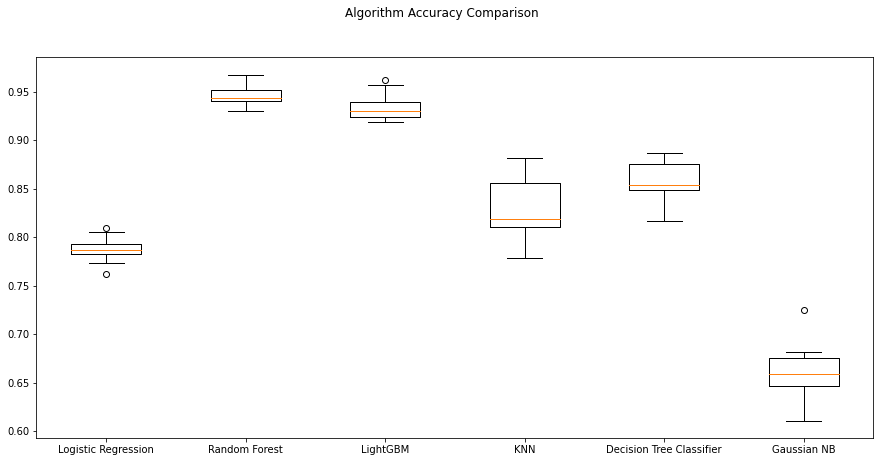

In [22]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(accuracy_results)
ax.set_xticklabels(model_names)
plt.show()

Площадь под кривой ROC (или сокращенно AUC) - это показатель производительности для задач двоичной классификации.
AUC представляет способность модели различать положительные и отрицательные классы. Область, равная 1,0, представляет модель, которая сделала все прогнозы идеально. Область, равная 0,5, представляет собой модель, столь же хорошую, как и случайная.

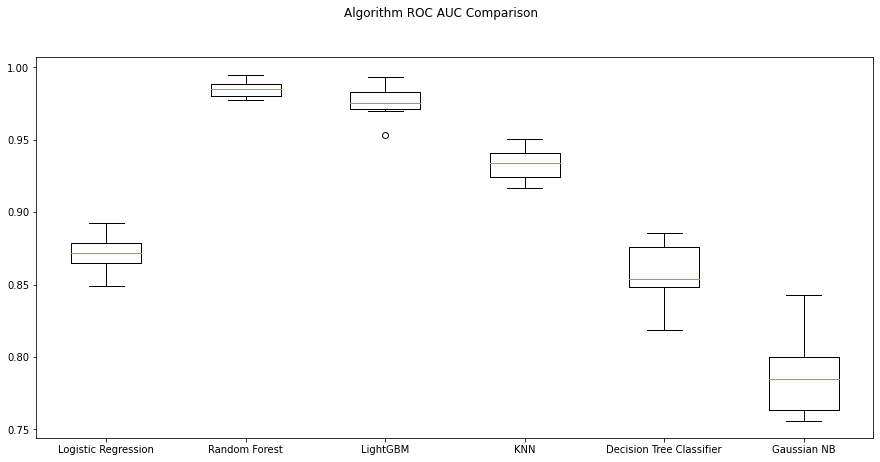

In [23]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(roc_auc_results)
ax.set_xticklabels(model_names)
plt.show()

Основываясь на нашем сравнительном анализе ROC AUC, Логистическая регрессия и Случайный лес показывают самые высокие средние показатели AUC. Мы составим краткий список этих двух алгоритмов для дальнейшего анализа. Смотрите ниже для получения более подробной информации об этих двух алгоритмах.

### 1) LogisticRegression

10-кратная перекрестная проверка для обучения модели логистической регрессии и ее оценки AUC.

In [47]:
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

AUC score (STD): 0.86 (0.02)


In [48]:
log_gs = GridSearchCV(model_classes[0][1],
                      return_train_score=True, 
                      param_grid=param_grid_logreg,
                      scoring='roc_auc', cv=10)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: LogisticRegression(C=0.17099999999999999, class_weight='balanced',
                   random_state=7, solver='liblinear')
best params: {'C': 0.17099999999999999}
best score: 0.8635300424822651


#### Оценка работу модели

Text(0.5, 257.44, 'Predicted label')

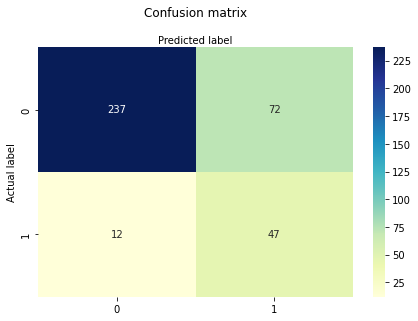

In [49]:
## Confusion Matrix
cnf_matrix = confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [50]:
y_predict_logreg = log_opt.predict(X_test)
res_logregr = calculate_metrics(y_test, y_predict_logreg, metrics=metrix)  
compare = compare.append(res_logregr, ignore_index=True)

C:\Users\isaev\AppData\Local\Temp\ipykernel_8064\585309609.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [51]:
compare

,F1_Score,Accuracy,Precision,Recall
0,0.52809,0.771739,0.394958,0.79661


In [52]:
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.95      0.77      0.85       309
         1.0       0.39      0.80      0.53        59

    accuracy                           0.77       368
   macro avg       0.67      0.78      0.69       368
weighted avg       0.86      0.77      0.80       368



### 2) RandomForest

In [52]:
grid_obj = GridSearchCV(model_classes[1][1],
                        return_train_score=True,
                        param_grid=param_grid_rf,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

ValueError: Input y contains NaN.

#### Оценка работы модели

Text(0.5, 257.44, 'Predicted label')

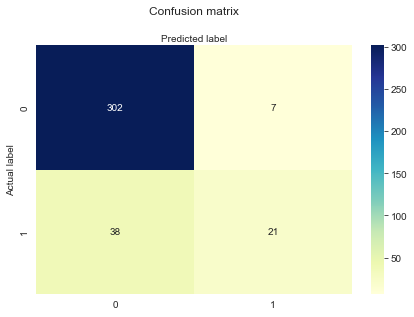

In [61]:
## Confusion Matrix
cnf_matrix = confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [62]:
y_predict_rf = rf_opt.predict(X_test)
res_rf = calculate_metrics(y_test, y_predict_rf, metrics=metrix)  
compare = compare.append(res_rf, ignore_index=True)

C:\Users\isaev\AppData\Local\Temp\ipykernel_11332\2442773220.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [63]:
compare

,F1_Score,Accuracy,Precision,Recall
0,0.505376,0.750000,0.370079,0.796610
1,0.482759,0.877717,0.750000,0.355932


In [64]:
rf_opt.fit(X_train, y_train)
print(classification_report(y_test, rf_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       309
         1.0       0.75      0.36      0.48        59

    accuracy                           0.88       368
   macro avg       0.82      0.67      0.71       368
weighted avg       0.87      0.88      0.86       368



### 3) KNN

In [65]:
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

modelCV = KNeighborsClassifier()
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

AUC score (STD): 0.66 (0.05)


In [66]:
grid_obj = GridSearchCV(model_classes[3][1],
                        return_train_score=True,
                        param_grid=param_grid_knn,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
knn_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best params: KNeighborsClassifier(n_neighbors=7, weights='distance')
best params: {'n_neighbors': 7, 'weights': 'distance'}
best score: 0.6918657586924437


C:\Users\isaev\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\isaev\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\isaev\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 196, in fit
    self.weights = _check_weights(self.weights)
  File "C:\Users\isaev\miniconda3\lib\site-packages\sklearn\neighbors\_base.py", line 82, in _check_weights
    raise ValueError(
ValueError: weights 

Text(0.5, 257.44, 'Predicted label')

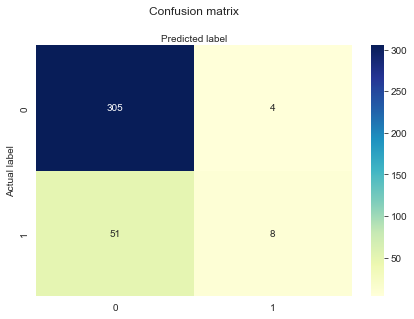

In [67]:
## Confusion Matrix
cnf_matrix = confusion_matrix(y_test, knn_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [68]:
y_predict_knn = knn_opt.predict(X_test)
res_knn = calculate_metrics(y_test, y_predict_knn, metrics=metrix)  
compare = compare.append(res_knn, ignore_index=True)

C:\Users\isaev\AppData\Local\Temp\ipykernel_11332\2029104284.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [69]:
compare

,F1_Score,Accuracy,Precision,Recall
0,0.505376,0.750000,0.370079,0.796610
1,0.482759,0.877717,0.750000,0.355932
2,0.225352,0.850543,0.666667,0.135593


In [70]:
knn_opt.fit(X_train, y_train)
print(classification_report(y_test, knn_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       309
         1.0       0.67      0.14      0.23        59

    accuracy                           0.85       368
   macro avg       0.76      0.56      0.57       368
weighted avg       0.83      0.85      0.81       368



### Построим roc_auc кривую для обоеих моделей

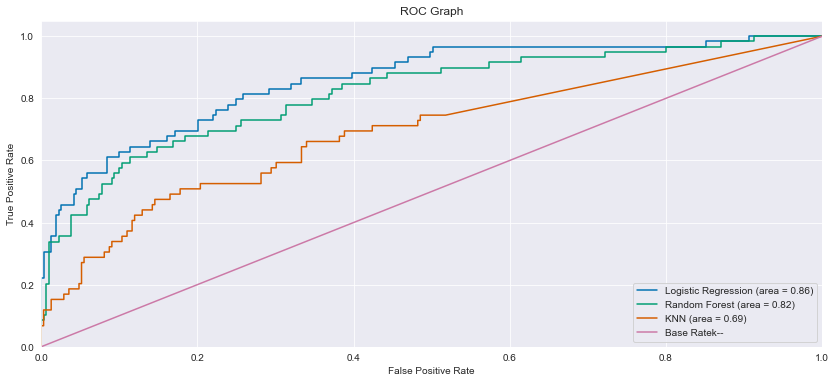

In [71]:
# Create ROC Graph
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_opt.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

probs_logreg = log_opt.predict_proba(X_test) # predict probabilities
probs_logreg = probs_logreg[:, 1] # we will only keep probabilities associated with the employee leaving

probs_rf = rf_opt.predict_proba(X_test) # predict probabilities
probs_rf = probs_rf[:, 1] # we will only keep probabilities associated with the employee leaving

probs_knn = knn_opt.predict_proba(X_test) # predict probabilities
probs_knn = probs_knn[:, 1] # we will only keep probabilities associated with the employee leaving

# Plot Logistic Regression ROC
logit_roc_auc = roc_auc_score(y_test, probs_logreg) # calculate AUC score using test dataset
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
rf_opt_roc_auc = roc_auc_score(y_test, probs_rf) # calculate AUC score using test dataset
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)

# Plot Random KNN ROC
knn_opt_roc_auc = roc_auc_score(y_test, probs_knn) # calculate AUC score using test dataset
plt.plot(knn_fpr, knn_tpr, label='KNN (area = %0.2f)' % knn_opt_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [72]:
import shap

Age-> Score: -0.00217
DailyRate-> Score: 0.00109
DistanceFromHome-> Score: -0.00543
Education-> Score: -0.00217
EnvironmentSatisfaction-> Score: 0.00870
Gender-> Score: -0.00380
HourlyRate-> Score: -0.00217
JobInvolvement-> Score: 0.02772
JobLevel-> Score: -0.00109
JobSatisfaction-> Score: 0.01739
MonthlyIncome-> Score: -0.01359
MonthlyRate-> Score: -0.00543
NumCompaniesWorked-> Score: 0.00924
OverTime-> Score: 0.02174
PercentSalaryHike-> Score: 0.00272
PerformanceRating-> Score: -0.00109
RelationshipSatisfaction-> Score: 0.00707
StockOptionLevel-> Score: 0.00054
TotalWorkingYears-> Score: -0.00380
TrainingTimesLastYear-> Score: 0.00380
WorkLifeBalance-> Score: 0.00217
YearsAtCompany-> Score: 0.00652
YearsInCurrentRole-> Score: 0.01250
YearsSinceLastPromotion-> Score: 0.00815
YearsWithCurrManager-> Score: 0.00652
BusinessTravel_Travel_Frequently-> Score: 0.01902
BusinessTravel_Travel_Rarely-> Score: 0.00870
Department_Research & Development-> Score: -0.00163
Department_Sales-> Score: 0

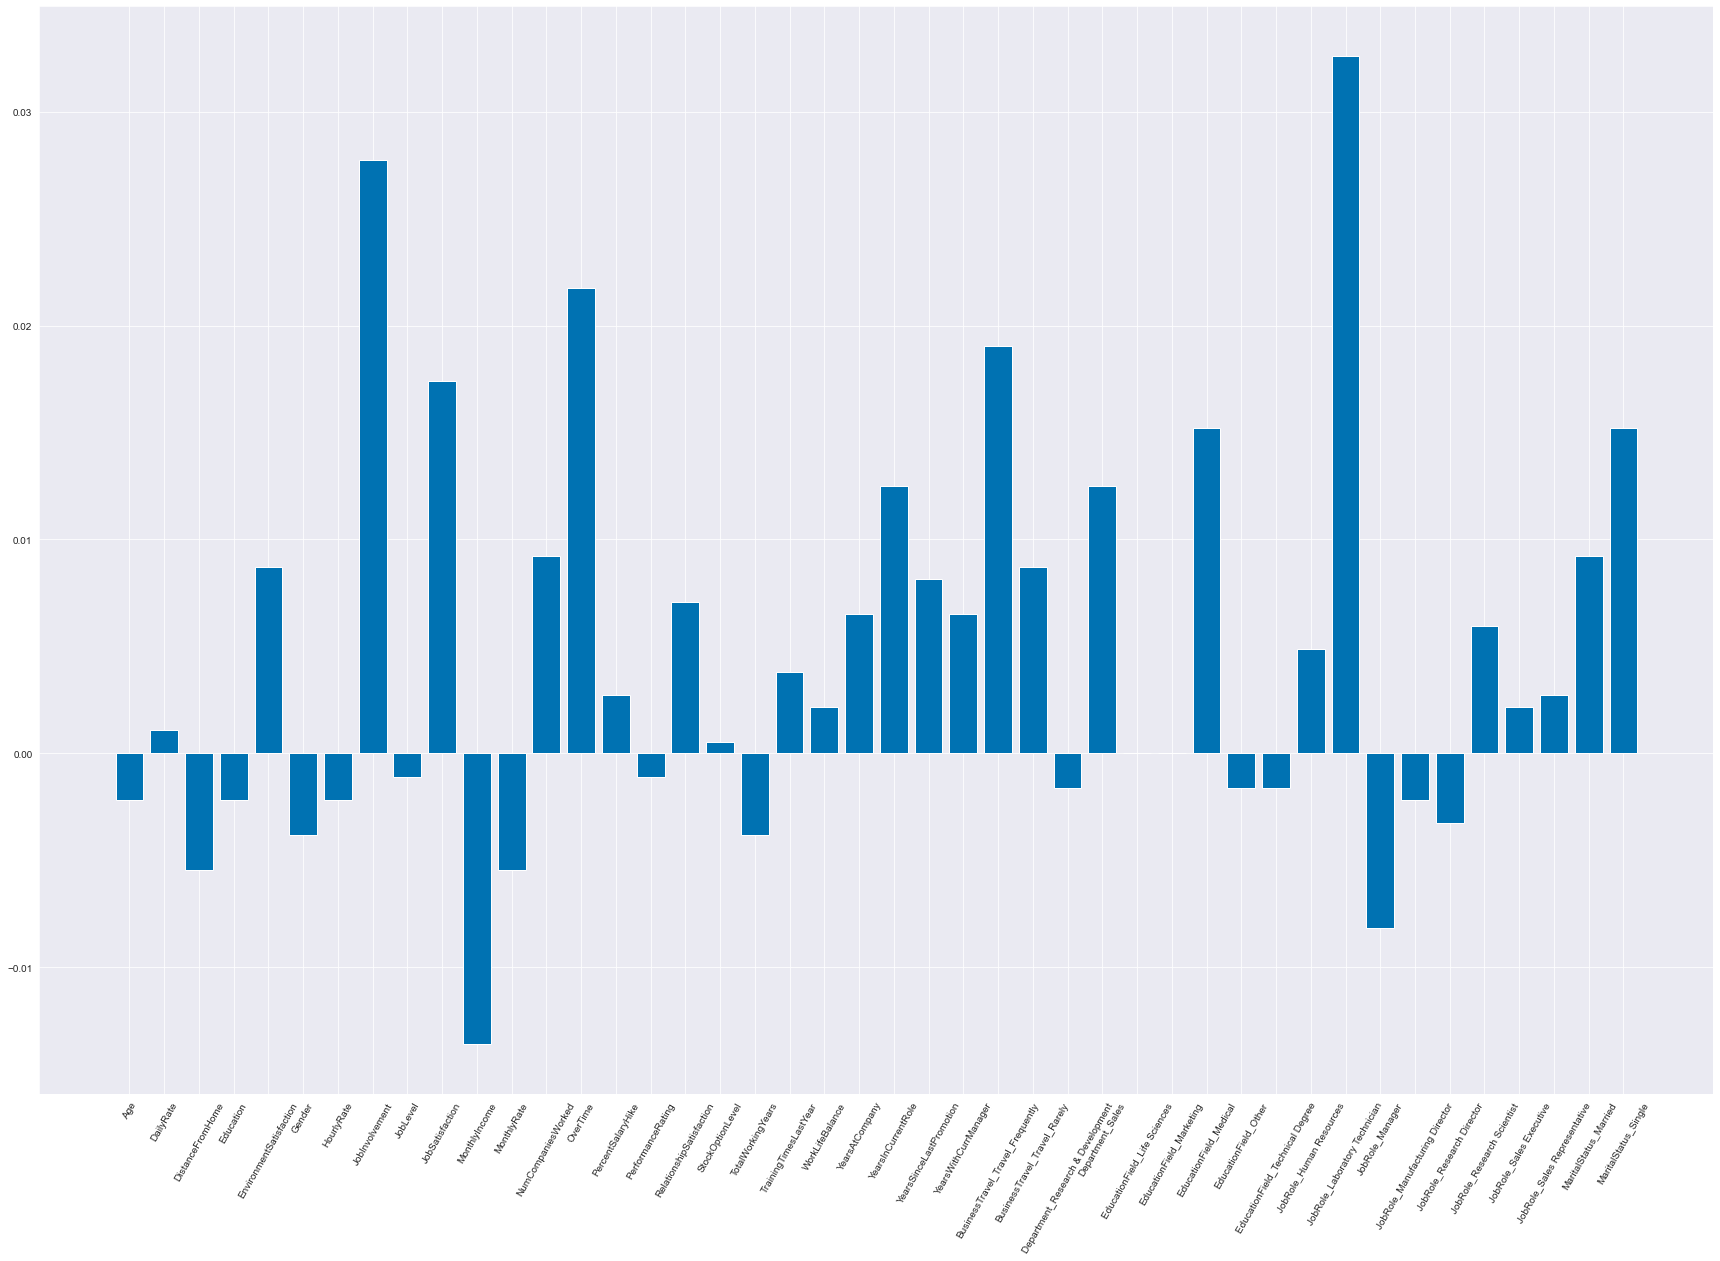

In [73]:
from sklearn.inspection import permutation_importance
results = permutation_importance(log_gs, X_test, y_test, scoring='accuracy')
importance = results.importances_mean
col = X_test.columns
k = 0
for i, v in enumerate(importance):
    print(col[k], '->', sep='', end=' ')
    print('Score: %.5f' % v)
    k+=1
plt.figure(figsize=(30, 20))
plt.xticks(rotation = 60)
plt.bar([x for x in col], importance)

plt.show()

X does not have valid feature names, but LogisticRegression was fitted with feature names


  0%|          | 0/1102 [00:00<?, ?it/s]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
The default o

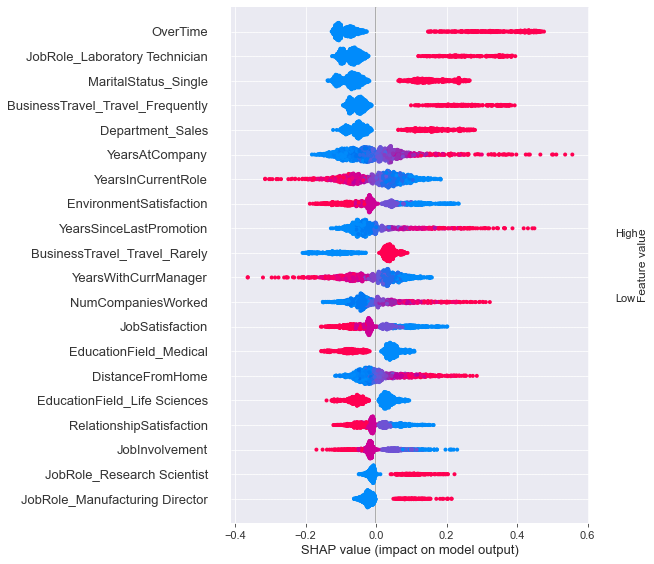

In [74]:
model = LogisticRegression(C=0.10099999999999998, solver='liblinear', class_weight="balanced", random_state=7)
model.fit(X_train, y_train)
explainer = shap.KernelExplainer(model.predict, X_train[:100], link='identity')
sum_plot = explainer.shap_values(X_train)
shap.summary_plot(sum_plot, X_train)

In [75]:
X_train_50 = X_train.iloc[:50]
y_train_50 = y_train.iloc[:50]
model.fit(X_train_50, y_train_50)
explainer = shap.KernelExplainer(model.predict, X_train_50, link='identity')
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
expected_value

X does not have valid feature names, but LogisticRegression was fitted with feature names


0.14

In [82]:
select = range(50)
features = X_test.iloc[select]
shap_values = explainer.shap_values(features)[1] 
features_display = X_test.loc[features.index]

  0%|          | 0/50 [00:00<?, ?it/s]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
The default o

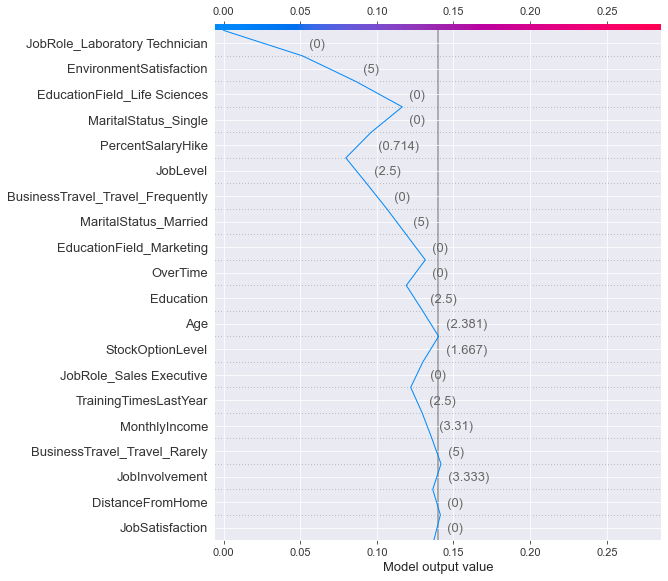

In [77]:
shap.decision_plot(expected_value, shap_values, features_display)

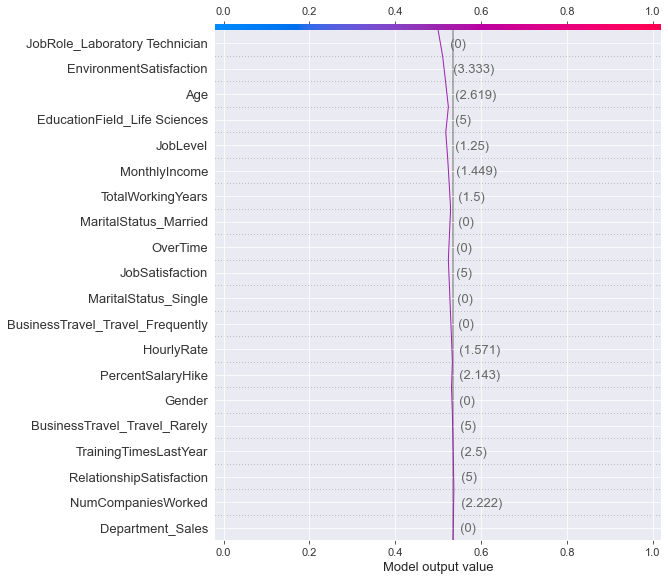

In [83]:
shap.decision_plot(expected_value, shap_values, features_display, link='logit') #with probabilities

# Анализ диаграммы Feature Importance
На этой диаграмме ось x обозначает значение shap_value, а ось y содержит features. Каждая точка на графике представляет собой одно shap_value для прогноза и feature. Малиновый цвет означает более высокий показатель feature, а синий - более низкий. На основе этой диаграммы можно получить общее представление о влиянии features на прогноз модели на основе распределения малиновых и синих точек. Судя по диаграмме, сильнее всего на решение людей уволиться согласно модели влияют: высокие переработки; частые командировки; большое число компаний, в которых работал человек; работа в отделе "Sales Representative", а также низкое вовлечение в рабочий процесс и низкое удовлетворение от работы и обстановки.